# Multi-class Classification Use Case Demonstration
##### Author: Partha Seetala

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

**Let's generate some synthetic data**

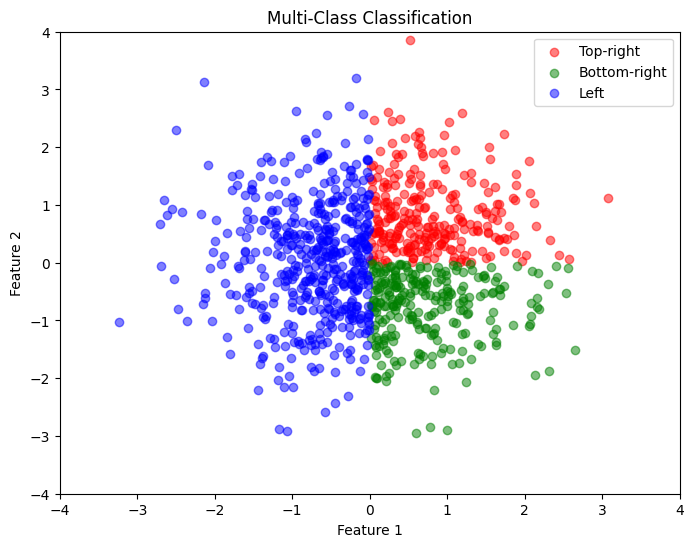

In [ ]:
def generate_data(n_samples=1000, n_labels=3, random_seed=42):
    np.random.seed(random_seed)

    # Generate random 2D points
    X = np.random.randn(n_samples, 2)

    # Define label regions
    y = np.zeros((n_samples, n_labels), dtype=int)

    # Label 1: Points in the top-right quadrant
    y[:, 0] = (X[:, 0] > 0) & (X[:, 1] > 0)

    # Label 2: Points in the bottom-right quadrant
    y[:, 1] = (X[:, 0] > 0) & (X[:, 1] < 0)

    # Label 3: Points in the left half (both quadrants)
    y[:, 2] = X[:, 0] < 0

    return X, y

# Generate data
X, y = generate_data(n_samples=1000)

# Plot the data
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
classes = ['Top-right', 'Bottom-right', 'Left']

for i in range(y.shape[1]):
    plt.scatter(X[y[:, i] == 1][:, 0], X[y[:, i] == 1][:, 1], alpha=0.5, label=classes[i], c=colors[i])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Multi-Class Classification')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.legend()
plt.show()


**Let's build the Neural Network Model to perform Multi-class classification**

In [ ]:
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Use softmax for multi-class classification
])

# Compile the model (we use cross-entropy loss function)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])



**Let's train the neural network**

In [ ]:
# Train the model
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f"Model Loss: {loss:.4f}")
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Epoch 1/50
25/25 [==============================] - 1s 22ms/step - loss: 0.8865 - accuracy: 0.7788 - val_loss: 0.6984 - val_accuracy: 0.9050
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5511 - accuracy: 0.9675 - val_loss: 0.4266 - val_accuracy: 0.9850
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.3350 - accuracy: 0.9725 - val_loss: 0.2701 - val_accuracy: 0.9800
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.2261 - accuracy: 0.9675 - val_loss: 0.1953 - val_accuracy: 0.9850
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 0.1735 - accuracy: 0.9688 - val_loss: 0.1537 - val_accuracy: 0.9900
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.1449 - accuracy: 0.9725 - val_loss: 0.1312 - val_accuracy: 0.9900
Epoch 7/50
25/25 [==============================] - 0s 7ms/step - loss: 0.1263 - accuracy: 0.9762 - val_loss: 0.1135 - val_accuracy: 0.9950
Epoch 8/50
25/25 [=

**Let's make some predictions**

In [ ]:
# Perform inference on the data
X = np.array([[-2, -1], [-1, -1], [2, -1], [1, 1], [1, -3], [0, 0], [-2, 2], [-4, 4], [2, 3], [2, 1]])


y_pred = model.predict(X)
y_pred_classes = (y_pred > 0.5).astype(int)


1/1 [==============================] - 0s 22ms/step


**Let's plot our predictions**

If our neural network is predicting correctly then it should color the dots correctly based on the quadrant they appear in

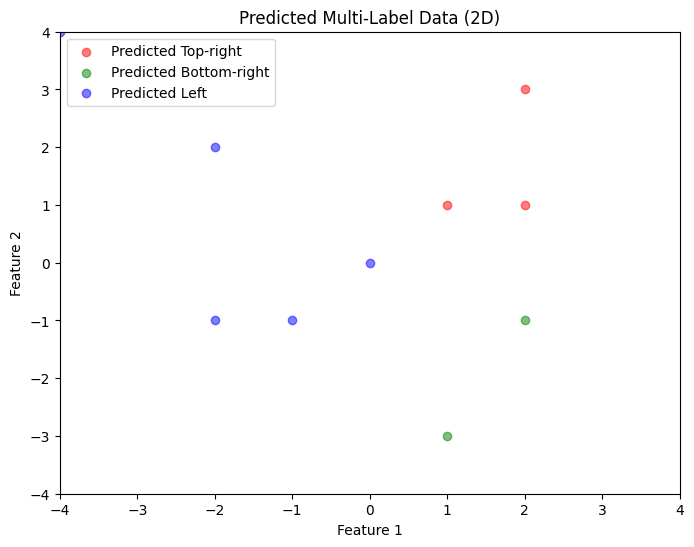

In [ ]:
# Plot the predicted data
plt.figure(figsize=(8, 6))

for i in range(y_pred_classes.shape[1]):
    plt.scatter(X[y_pred_classes[:, i] == 1][:, 0], X[y_pred_classes[:, i] == 1][:, 1], alpha=0.5, label=f'Predicted {classes[i]}', c=colors[i])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicted Multi-Label Data (2D)')
plt.legend()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()
